In [1]:
import re
import pandas as pd
from datetime import datetime

In [2]:
train = pd.read_csv("../data/train.csv")

In [3]:
def parsedate(s : str):
    if s=='11-MAR-2018 20:40:58':
        d = ' '.join(['11 Mar 2018', '20:40:58', '+0000'])
    else:
        s = s.replace('0580', '0530')
        s = s.replace('-0000', '+0000')
        tz = re.search('[+-]{1}[0-9]{4}|$', s).group()
        if tz=='':
            tz='+0000'
        date = re.search('[0-9]{1,2}\s+[A-Za-z]{3}\s+[0-9]{2,4}|$', s).group()
        time = re.search('[0-9]{2}:[0-9]{2}:[0-9]{2}|$', s).group()
        d= ' '.join([date, time, tz])
    try:
        res = datetime.strptime(d, '%d %b %Y %H:%M:%S %z')
    except Exception as e:
        res = datetime.strptime(d, '%d %b %y %H:%M:%S %z')
    return res

train["date"] = train["date"].map(lambda d: parsedate(d))

In [4]:
train["date"] = train["date"].map(lambda d: str(d.date()) + " " + str(d.time()))

In [5]:
train["date"] = pd.to_datetime(train["date"])

In [6]:
train.set_index("date", inplace=True)

In [7]:
dummy_targets = pd.get_dummies(train["label"])

In [8]:
dummy_targets

,0,1,2,3,4,5,6,7
date,,,,,,,,
2017-11-06 11:13:45,0,0,1,0,0,0,0,0
2018-02-14 11:00:16,0,1,0,0,0,0,0,0
2016-07-06 19:53:37,0,1,0,0,0,0,0,0
2019-10-11 11:25:40,0,1,0,0,0,0,0,0
2017-11-07 11:07:18,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2020-06-30 05:55:20,0,0,0,1,0,0,0,0
2015-05-01 11:48:55,1,0,0,0,0,0,0,0
2020-05-26 08:18:43,1,0,0,0,0,0,0,0


### Distribution of labels

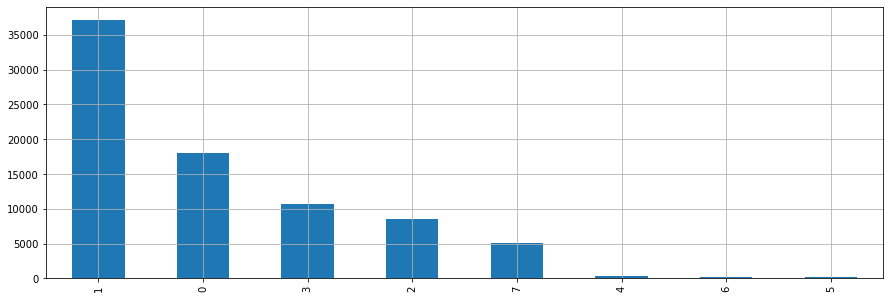

In [9]:
train.label.value_counts().plot(kind="bar", figsize=(15, 5), grid=True)

### Analyze the targets over time

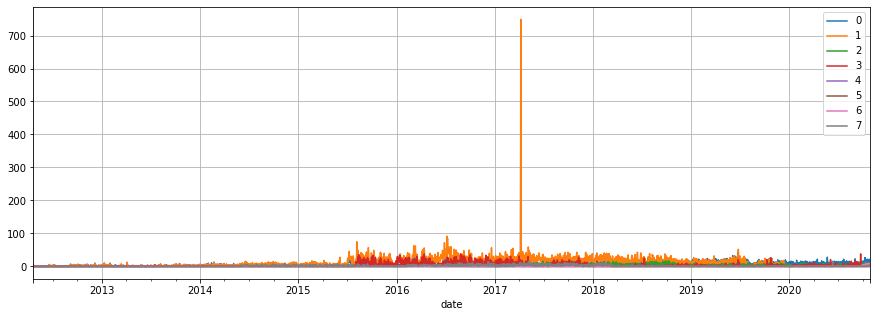

In [10]:
dummy_targets.resample("d").agg("sum").plot(figsize=(15, 5), grid=True)

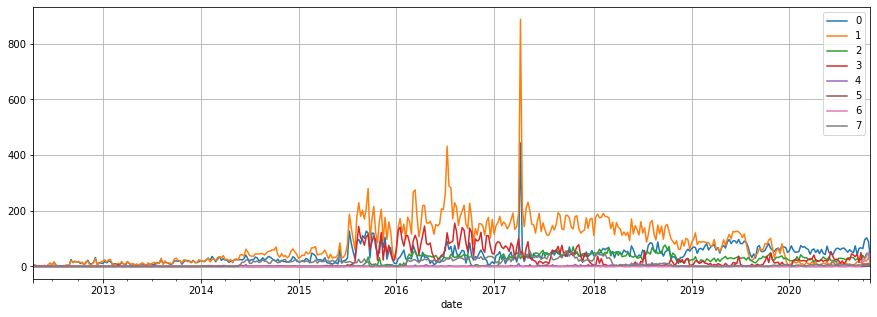

In [11]:
dummy_targets.resample("w").agg("sum").plot(figsize=(15, 5), grid=True)

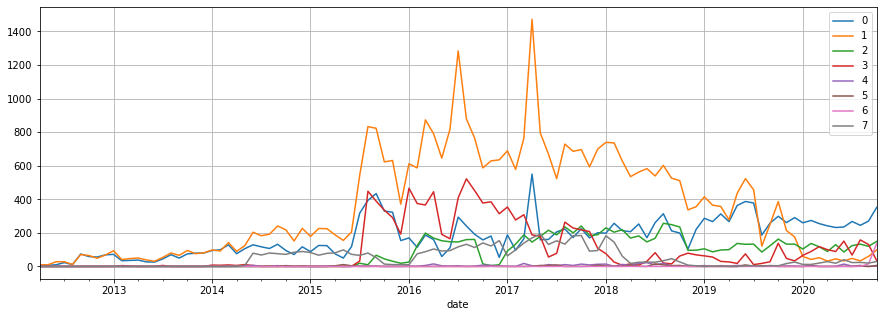

In [12]:
dummy_targets.resample("m").agg("sum").plot(figsize=(15, 5), grid=True)

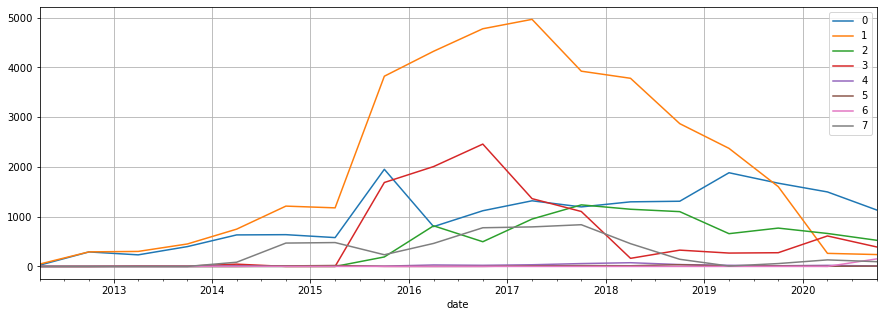

In [13]:
dummy_targets.resample("2Q").agg("sum").plot(figsize=(15, 5), grid=True)

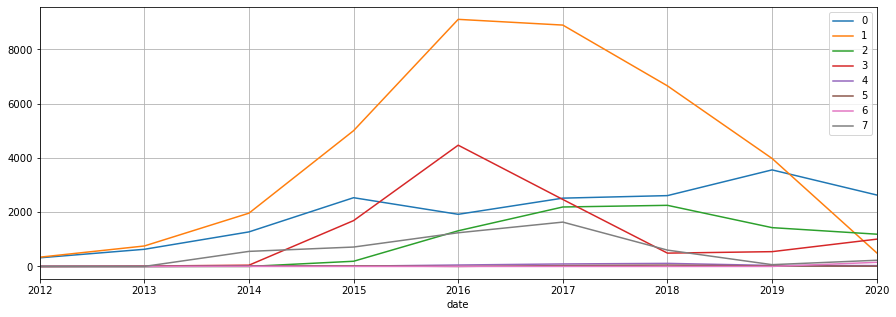

In [14]:
dummy_targets.resample("y").agg("sum").plot(figsize=(15, 5), grid=True)

In [15]:
train

,Unnamed: 0,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
date,,,,,,,,,,,,,
2017-11-06 11:13:45,0,reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027,2
2018-02-14 11:00:16,1,edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961,1
2016-07-06 19:53:37,2,usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149,1
2019-10-11 11:25:40,3,granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296,1
2017-11-07 11:07:18,4,github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 05:55:20,80171,github,com,1,0,multipart/alternative,0,8,0,0,91.0,1307,3
2015-05-01 11:48:55,80172,NaN,NaN,0,0,text/html,0,2,1,0,73.0,13464,0
2020-05-26 08:18:43,80173,google,com,0,0,multipart/alternative,27,85,0,0,46.0,28485,0
